In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
# Load the Titanic dataset
titanic_data = pd.read_csv("D:\PythonPrograms\CODSOFT\Task-1 (Titanic survival prediction)\Titanic-Dataset.csv")

In [4]:
# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check basic statistics for numerical columns
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check for missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

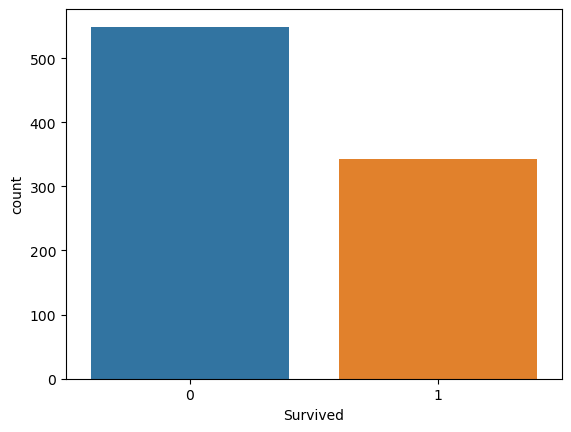

In [7]:
# Visualize the count of survived vs. not survived
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

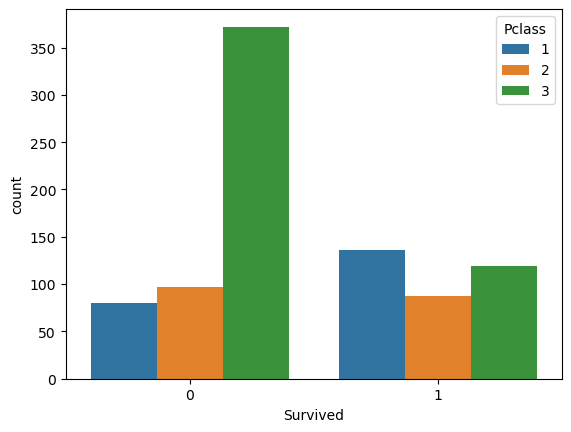

In [8]:
# Visualize the count of survived vs. not survived based on Pclass
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

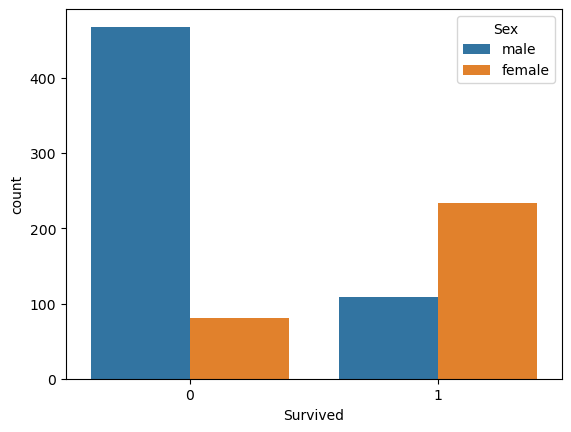

In [9]:
# Visualize the count of survived vs. not survived based on Gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<Axes: xlabel='Age', ylabel='Count'>

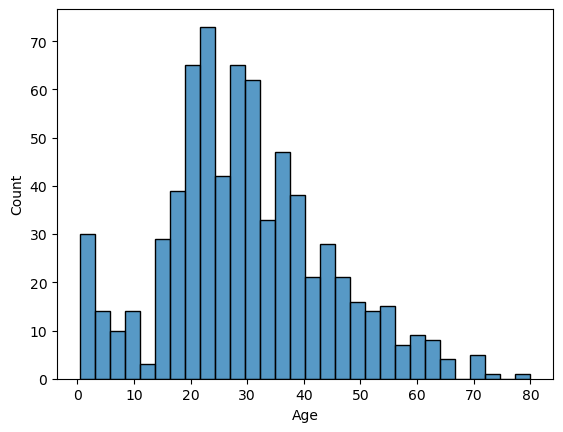

In [10]:
# Visualize the distribution of ages
sns.histplot(titanic_data['Age'].dropna(), bins=30)

<Axes: xlabel='Fare', ylabel='Count'>

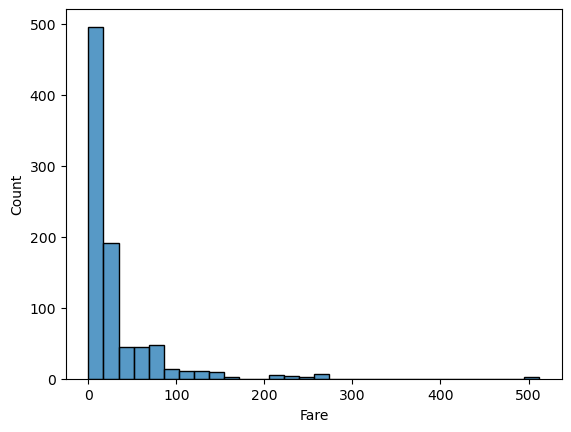

In [11]:
# Visualize the distribution of fares
sns.histplot(titanic_data['Fare'], bins=30)


c:\Users\wasee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


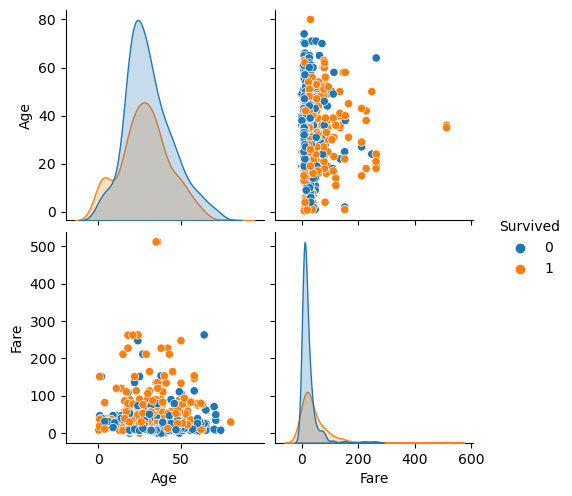

In [12]:
# Explore relationships between variables
sns.pairplot(titanic_data[['Age', 'Fare', 'Survived']], hue='Survived')


In [13]:
# Encode categorical variables (e.g., 'Sex')
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

In [14]:
# Split the data into features (X) and target variable (y)
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]  # Add other features as needed
y = titanic_data['Survived']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Replace NaN values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a logistic regression model on imputed data
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7988826815642458
